# Exploratory Data Analysis of IPL-Matches(2008-2022)
As you all know Cricket is a sport played and watched by millions of people around the world but Indians and Pakistanis are mad about cricket. Cricket is played in our streets. We like it so much. People in both countries are crazy about the game. Cricket unites India and Pakistan like anything. As a cricket lover, I decided to analyze the data of IPL matches. Why IPL match? Because cricket is not a game of any specific country or a nation, I love Indian league IPL as I like Pakistani league PSL. So, that why I shall anlyze the data of IPL matches from 2008 to 2022.

I found IPL matches (2008-2022) dataset from kaggle.
- Here is the link of IPL matches Dataset: https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

## Data Selection and Installing 
First we will select appropriate dataset from kaggle which I have done. You can check it at this link: https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv. To download our dataset we have to install opendataset library by pip install command.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv'

In [3]:
import opendatasets as od

*For downloading our dataset from kaggle we have to provide our **kaggle username*** and ***kaggle key***. For kaggle key go to profile setting and creat new API key and then copy and paste it there*

In [4]:
od.download(dataset_url)

Skipping, found downloaded files in ".\ipl-2008-to-2021-all-match-dataset" (use force=True to force download)


The Dataset has been downloaded.

## Essential Libraries for this Project
Lets import essential libraries for this project

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Data Preparation and Cleaning
First, we load our dataset into DataFrame and see our DataFrame some first and last rows to overview of dataset

In [7]:
IPL_matches_df = pd.read_csv('IPL_Matches_2008_2022.csv')

In [8]:
IPL_matches_df.head()

ID       City        Date Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29   2022        Final   
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25   2022   Eliminator   
3  1312197    Kolkata  2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22   2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Gardens, Kolkata        Gujarat Titans        field   
4          Wankhede Stadium, Mumbai   Sunrisers Hyderabad          bat   

  SuperOver                  WinningTeam    WonBy  Margin method  \
0         N               Gujarat Titans  Wickets     7.0    NaN   
1         N             Rajasthan Royals  Wickets     7.0    NaN   
2         N  Royal Challengers Bangalore     Runs    14.0    NaN   
3         N               Gujarat Titans  Wickets     7.0    NaN   
4         N                 Punjab Kings  Wickets     5.0    NaN   

  Player_of_Match                                       Team1Players  \
0       HH Pandya  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1      JC Buttler  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2      RM Patidar  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3       DA Miller  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4   Harpreet Brar  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   

                                        Team2Players        Umpire1  \
0  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...    CB Gaffaney   
1  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...    CB Gaffaney   
2  ['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...  J Madanagopal   
3  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...   BNJ Oxenford   
4  ['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...   AK Chaudhary   

         Umpire2  
0    Nitin Menon  
1    Nitin Menon  
2       MA Gough  
3      VK Sharma  
4  NA Patwardhan

In [9]:
IPL_matches_df.tail()

ID        City        Date   Season MatchNumber  \
945  335986     Kolkata  2008-04-20  2007/08           4   
946  335985      Mumbai  2008-04-20  2007/08           5   
947  335984       Delhi  2008-04-19  2007/08           3   
948  335983  Chandigarh  2008-04-19  2007/08           2   
949  335982   Bangalore  2008-04-18  2007/08           1   

                           Team1                        Team2  \
945        Kolkata Knight Riders              Deccan Chargers   
946               Mumbai Indians  Royal Challengers Bangalore   
947             Delhi Daredevils             Rajasthan Royals   
948              Kings XI Punjab          Chennai Super Kings   
949  Royal Challengers Bangalore        Kolkata Knight Riders   

                                          Venue                   TossWinner  \
945                                Eden Gardens              Deccan Chargers   
946                            Wankhede Stadium               Mumbai Indians   
947                            Feroz Shah Kotla             Rajasthan Royals   
948  Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
949                       M Chinnaswamy Stadium  Royal Challengers Bangalore   

    TossDecision SuperOver                  WinningTeam    WonBy  Margin  \
945          bat         N        Kolkata Knight Riders  Wickets     5.0   
946          bat         N  Royal Challengers Bangalore  Wickets     5.0   
947          bat         N             Delhi Daredevils  Wickets     9.0   
948          bat         N          Chennai Super Kings     Runs    33.0   
949        field         N        Kolkata Knight Riders     Runs   140.0   

    method Player_of_Match                                       Team1Players  \
945    NaN       DJ Hussey  ['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...   
946    NaN      MV Boucher  ['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...   
947    NaN     MF Maharoof  ['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...   
948    NaN      MEK Hussey  ['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...   
949    NaN     BB McCullum  ['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...   

                                          Team2Players    Umpire1  \
945  ['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...  BF Bowden   
946  ['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...   SJ Davis   
947  ['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...  Aleem Dar   
948  ['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...  MR Benson   
949  ['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...  Asad Rauf   

            Umpire2  
945     K Hariharan  
946       DJ Harper  
947  GA Pratapkumar  
948      SL Shastri  
949     RE Koertzen

**To take look of whole DataFram we have to change our display setting of rows, by default the max rows display is 60 in some computer. To see whole DataFrame we have to set max row greater than our DataFrame rows.** 

In [10]:
pd.options.display.max_rows = 999

By looking at the dataset we can see that our dataset contains many rows and columns. The dataset includes **MatchNumber**, **Team1**, **Team2**, **Venue**, **Team1Players**, **Team2Players**, **Umpire1** and **Umpire2** Data which gives us information about where match held, which teams played a match and about team players, about umpires also and information about **winning team** and win stats.

In [12]:
IPL_matches_df.shape

(950, 20)

There is 950 rows and 20 columns in our Dataset

In [13]:
IPL_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

So, we have also some null values and unnecessary columns.

In [14]:
IPL_matches_df.describe()

ID      Margin
count  9.500000e+02  932.000000
mean   8.304852e+05   17.056867
std    3.375678e+05   21.633109
min    3.359820e+05    1.000000
25%    5.012612e+05    6.000000
50%    8.297380e+05    8.000000
75%    1.175372e+06   19.000000
max    1.312200e+06  146.000000

**In IPL 2008 to 2022 dataset the maximum margin of winning team is 146 runs and the minimum margin is only 1 run.**

In [15]:
IPL_matches_df.nunique()

ID                 950
City                33
Date               706
Season              15
MatchNumber         80
Team1               18
Team2               18
Venue               49
TossWinner          18
TossDecision         2
SuperOver            2
WinningTeam         18
WonBy                4
Margin              94
method               1
Player_of_Match    262
Team1Players       932
Team2Players       937
Umpire1             58
Umpire2             60
dtype: int64

#### The above table provides us with very useful information. By above table we can see that as of 2022, there have been 15 seasons of IPL tournament hosted by 33 cities. Although, 18 teams have played and 262 Players become player of match in past seasons of IPL.

In [16]:
IPL_matches_df.isnull().values.any()

True

There is some empty (NULL) cells in our dataset.

In [17]:
IPL_matches_df.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [18]:
IPL_matches_df.isnull().sum().sum()

1012

#### There is total 1012 empty cells in our data set, method contains 931 empty cells and it not give us any essential information so, we will delete this cell later.

In [19]:
IPL_matches_df.Date.dtype

dtype('O')

In our DataFrame the date should be a string that represent date for future work with date. Let's convert all cells in **Date** column to dates. Pandas have **datetime()** method for this. 

In [20]:
IPL_matches_df['Date']=pd.to_datetime(IPL_matches_df.Date)
IPL_matches_df.Date.head(10)

0   2022-05-29
1   2022-05-27
2   2022-05-25
3   2022-05-24
4   2022-05-22
5   2022-05-21
6   2022-05-20
7   2022-05-19
8   2022-05-18
9   2022-05-17
Name: Date, dtype: datetime64[ns]

Now, we will clean empty cells, wrong data and unusual data. We will also check any duplicate data in our dataset.

In [21]:
IPL_matches_df.loc[(IPL_matches_df['Venue']== 'Dubai International Cricket Stadium'),['City']] = 'Dubai'
IPL_matches_df.loc[(IPL_matches_df['Venue'] == 'Sharjah Cricket Stadium'),['City']] = 'Sharjah'
IPL_matches_df['SuperOver'].fillna('NoResult',inplace=True)
IPL_matches_df['WinningTeam'].fillna('NoResult',inplace=True)
IPL_matches_df['Player_of_Match'].fillna('NoResult',inplace= True)
IPL_matches_df['Margin'].fillna('NoMargin',inplace = True)

In [22]:
IPL_matches_df=IPL_matches_df.drop(['method'],axis =1 )

In [23]:
IPL_matches_df.isnull().any()

ID                 False
City               False
Date               False
Season             False
MatchNumber        False
Team1              False
Team2              False
Venue              False
TossWinner         False
TossDecision       False
SuperOver          False
WinningTeam        False
WonBy              False
Margin             False
Player_of_Match    False
Team1Players       False
Team2Players       False
Umpire1            False
Umpire2            False
dtype: bool

In [24]:
IPL_matches_df.duplicated().any()

False

In IPL there are some teams whose named changed after some season. So, we will also rename the teams to get more efficient analysis.

In [25]:
IPL_matches_df['Team1']=IPL_matches_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
IPL_matches_df['Team2']=IPL_matches_df['Team2'].str.replace('Kings XI Punjab','Punjab Kings')
IPL_matches_df['WinningTeam']=IPL_matches_df['WinningTeam'].str.replace('Kings XI Punjab','Punjab Kings')

IPL_matches_df['Team1']=IPL_matches_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
IPL_matches_df['Team2']=IPL_matches_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
IPL_matches_df['WinningTeam']=IPL_matches_df['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

IPL_matches_df['Team1']=IPL_matches_df['Team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
IPL_matches_df['Team2']=IPL_matches_df['Team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
IPL_matches_df['WinningTeam']=IPL_matches_df['WinningTeam'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

Now our dataset has been clean and there is no other null cells and wrong data of wrong format. And luckily there is no duplicate in our dataset.

In [26]:
IPL_matches_df.head()

ID       City       Date Season  MatchNumber  \
0  1312200  Ahmedabad 2022-05-29   2022        Final   
1  1312199  Ahmedabad 2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata 2022-05-25   2022   Eliminator   
3  1312197    Kolkata 2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai 2022-05-22   2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Gardens, Kolkata        Gujarat Titans        field   
4          Wankhede Stadium, Mumbai   Sunrisers Hyderabad          bat   

  SuperOver                  WinningTeam    WonBy Margin Player_of_Match  \
0         N               Gujarat Titans  Wickets    7.0       HH Pandya   
1         N             Rajasthan Royals  Wickets    7.0      JC Buttler   
2         N  Royal Challengers Bangalore     Runs   14.0      RM Patidar   
3         N               Gujarat Titans  Wickets    7.0       DA Miller   
4         N                 Punjab Kings  Wickets    5.0   Harpreet Brar   

                                        Team1Players  \
0  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   

                                        Team2Players        Umpire1  \
0  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...    CB Gaffaney   
1  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...    CB Gaffaney   
2  ['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...  J Madanagopal   
3  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...   BNJ Oxenford   
4  ['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...   AK Chaudhary   

         Umpire2  
0    Nitin Menon  
1    Nitin Menon  
2       MA Gough  
3      VK Sharma  
4  NA Patwardhan

We also have anoher dataset which has information of each ball bowled in last 15 season of IPL. Let's load the dataset.

In [27]:
IPL_ball_by_ball_df = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
IPL_ball_by_ball_df.head()

ID  innings  overs  ballnumber       batter          bowler  \
0  1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1  1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2  1312200        1      0           3   JC Buttler  Mohammed Shami   
3  1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4  1312200        1      0           5  YBK Jaiswal  Mohammed Shami   

   non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0   JC Buttler        NaN            0           0          0             0   
1   JC Buttler    legbyes            0           1          1             0   
2  YBK Jaiswal        NaN            1           0          1             0   
3   JC Buttler        NaN            0           0          0             0   
4   JC Buttler        NaN            0           0          0             0   

   isWicketDelivery player_out kind fielders_involved       BattingTeam  
0                 0        NaN  NaN               NaN  Rajasthan Royals  
1                 0        NaN  NaN               NaN  Rajasthan Royals  
2                 0        NaN  NaN               NaN  Rajasthan Royals  
3                 0        NaN  NaN               NaN  Rajasthan Royals  
4                 0        NaN  NaN               NaN  Rajasthan Royals

In [28]:
IPL_ball_by_ball_df.shape

(225954, 17)

There is 225954 rows and 17 coulumns in our dataset

In [29]:
IPL_ball_by_ball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

We can see that there is some Null cells in our dataset, first we will clean and modify NULL cells.

In [30]:
IPL_ball_by_ball_df['extra_type'].fillna('N',inplace = True)
IPL_ball_by_ball_df['player_out'].fillna('N',inplace = True)
IPL_ball_by_ball_df['kind'].fillna('N',inplace = True)
IPL_ball_by_ball_df['fielders_involved'].fillna('N',inplace = True)

In [31]:
IPL_ball_by_ball_df.isnull().values.any()

False

Now, there is no null cells in our dataset 
That's mean our dataset is now clean and ready for analyzing using plots and charts.

# Exploratory Data Analysis
Now we will analyze our IPL dataset containing information about macthes, venue and scoring of IPL 15 seasons 2008 to 2022.

In [32]:
IPL_matches_df.Team1.unique().reshape(15,1)

array([['Rajasthan Royals'],
       ['Royal Challengers Bangalore'],
       ['Sunrisers Hyderabad'],
       ['Delhi Capitals'],
       ['Chennai Super Kings'],
       ['Gujarat Titans'],
       ['Lucknow Super Giants'],
       ['Kolkata Knight Riders'],
       ['Punjab Kings'],
       ['Mumbai Indians'],
       ['Rising Pune Supergiant'],
       ['Gujarat Lions'],
       ['Pune Warriors'],
       ['Deccan Chargers'],
       ['Kochi Tuskers Kerala']], dtype=object)

This are all teams that have played in last 15 seasons of IPL.

## Total Matches Played by a team

In [33]:
match_df = pd.concat([IPL_matches_df['Team1'],IPL_matches_df['Team2']]).value_counts().reset_index()
match_df.set_axis(['Teams','Total_Matches'],axis = 'columns' ,inplace = True)
match_df

Teams  Total_Matches
0                Mumbai Indians            231
1   Royal Challengers Bangalore            226
2                Delhi Capitals            224
3         Kolkata Knight Riders            223
4                  Punjab Kings            218
5           Chennai Super Kings            208
6              Rajasthan Royals            192
7           Sunrisers Hyderabad            152
8               Deccan Chargers             75
9                 Pune Warriors             46
10       Rising Pune Supergiant             30
11                Gujarat Lions             30
12               Gujarat Titans             16
13         Lucknow Super Giants             15
14         Kochi Tuskers Kerala             14

In [34]:
def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

In [35]:
pal_vi = get_color('viridis_r', len(match_df))

In [36]:
!pip install plotly --upgrade --quiet
import plotly.express as px
fig = px.bar(match_df, x='Teams', y='Total_Matches', text='Total_Matches',
             color ='Teams', color_discrete_sequence=pal_vi)

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=1100, height=500,
                  margin = dict(t=15, l=15, r=15, b=15))
fig.show()

Unable to create process using 'C:\Users\SYED AZIZ AHMED\anaconda3\python.exe "C:\Users\SYED AZIZ AHMED\anaconda3\Scripts\pip-script.py" install plotly --upgrade --quiet'


By above analysis we can see that number of matches played by Mumbai indians, Royal Challengers Bangalore, Delhi Capitals, Kolkata Knight Riders, Punjab Kings, Chennai Super Kings is high. On the other hand, Punjab Kings, Kochi Tuskers Kerala, Pune Warriors, Gujarat Lions, Rising Pune Supergiant are the defunct team by BCCI.

## Winning Ratio Analysis

In [37]:
win_df = match_df
win_df['total_wins']=IPL_matches_df['WinningTeam'].value_counts().reset_index()['WinningTeam']
win_df['win_ratio']= round((win_df['total_wins']/win_df['Total_Matches']),2)*100
win_df

Teams  Total_Matches  total_wins  win_ratio
0                Mumbai Indians            231         131       57.0
1   Royal Challengers Bangalore            226         121       54.0
2                Delhi Capitals            224         114       51.0
3         Kolkata Knight Riders            223         109       49.0
4                  Punjab Kings            218         103       47.0
5           Chennai Super Kings            208         101       49.0
6              Rajasthan Royals            192          96       50.0
7           Sunrisers Hyderabad            152          75       49.0
8               Deccan Chargers             75          29       39.0
9                 Pune Warriors             46          15       33.0
10       Rising Pune Supergiant             30          13       43.0
11                Gujarat Lions             30          12       40.0
12               Gujarat Titans             16          12       75.0
13         Lucknow Super Giants             15           9       60.0
14         Kochi Tuskers Kerala             14           6       43.0

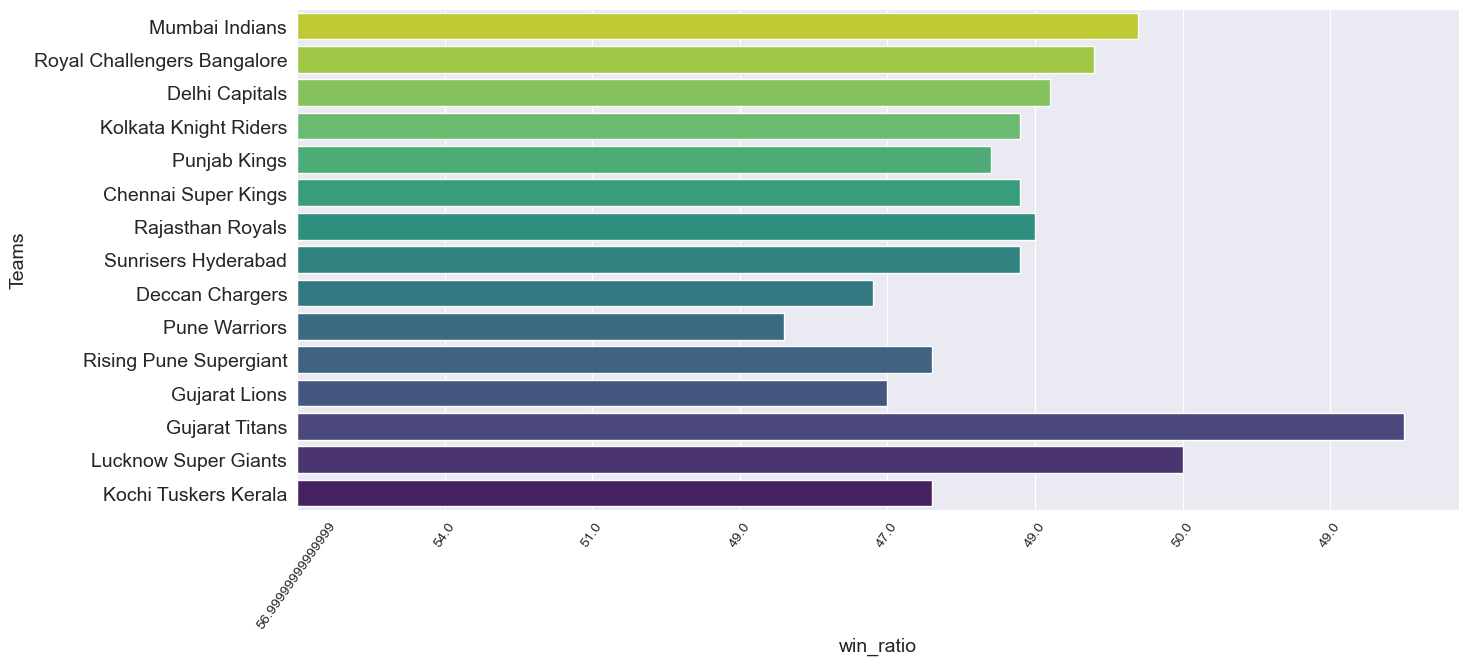

In [38]:
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
wi = sns.barplot(data=win_df, x='win_ratio', y='Teams', ci=False, palette='viridis_r')
wi.set_xticklabels(win_df['win_ratio'], rotation=55, fontdict={'fontsize':10})
plt.show()

we can see that Gujrat Titans has best winning percentage but Gujrat Titans has low number of matches played. So, overall Mumbai Indians has good winning percentage.

## Top 10 Batters that gets Player of Match Title 

In [39]:
player_of_macth_df = IPL_matches_df['Player_of_Match'].value_counts().reset_index()
player_of_macth_df.set_axis(['Player_of_Match','Count'],axis = 'columns' ,inplace = True)
top_10_Player_of_match = player_of_macth_df.head(10)

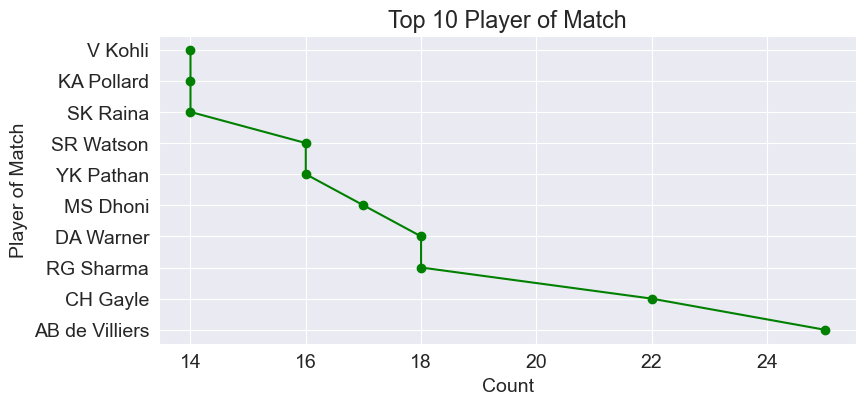

In [40]:
plt.figure(figsize=(9,4))
plt.plot(top_10_Player_of_match['Count'], top_10_Player_of_match['Player_of_Match'], 'o-g')

plt.xlabel('Count')
plt.ylabel('Player of Match')

plt.title('Top 10 Player of Match');

Above analysis show that, with 25 man of the match trophies, **AB de Villiers** has most man of the match in IPL. While **CH Gayle** is in second number who has most man of the match in IPL. 

## Top 10 IPL hosted cities
We will analyze the top cities that hosted IPL most time.

In [41]:
citraw = IPL_matches_df['City'].value_counts().reset_index()
citraw.set_axis(['City','Hosted_Number'],axis = 'columns' ,inplace = True)
top10_city_host = citraw.head(10)
top10_city_host

City  Hosted_Number
0      Mumbai            159
1     Kolkata             79
2       Delhi             78
3     Chennai             67
4   Bangalore             65
5   Hyderabad             64
6  Chandigarh             56
7        Pune             51
8      Jaipur             47
9       Dubai             46

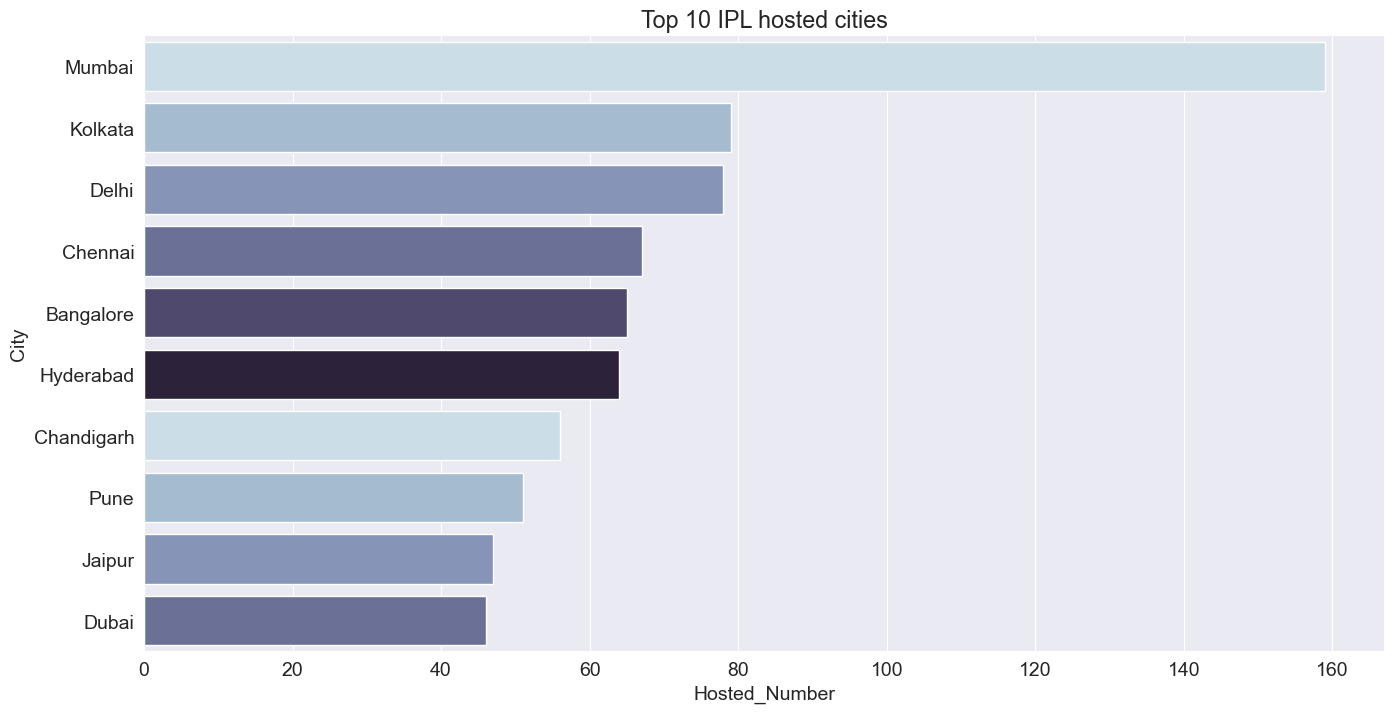

In [42]:
plt.figure(figsize=(16,8))
palette_color = sns.color_palette("ch:s=.25,rot=-.25")
sns.barplot(x='Hosted_Number', y='City',palette = palette_color, data=top10_city_host);
plt.title('Top 10 IPL hosted cities');

Mumbai hosted maximum matches of Indian Premium League.

## Number of Matches hosted in Seasons

In [43]:
IPL_matches_df["Season"]=pd.DatetimeIndex(IPL_matches_df["Date"]).year
matches_in_season=IPL_matches_df.groupby(['Season'])['ID'].count().reset_index().rename(columns={'ID':'matches'})
matches_in_season

Season  matches
0     2008       58
1     2009       57
2     2010       60
3     2011       73
4     2012       74
5     2013       76
6     2014       60
7     2015       59
8     2016       60
9     2017       59
10    2018       60
11    2019       60
12    2020       60
13    2021       60
14    2022       74

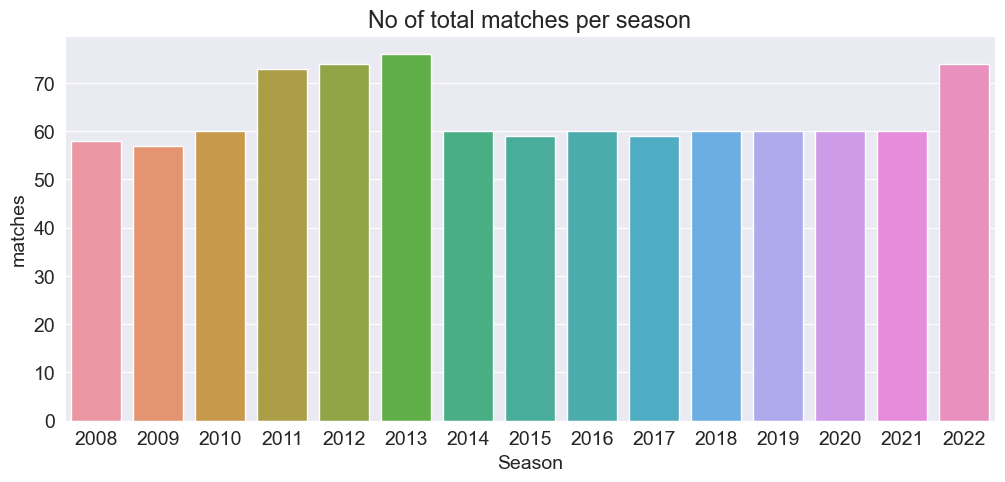

In [44]:
plt.figure(figsize=(12,5))

sns.barplot(x='Season', y='matches', data=matches_in_season);
plt.title('No of total matches per season');

There is chart that show total number of matches held in each Season of IPL. In 2011,2012,2013 and 2022 IPL number of total matches greater than other seasons.  

## Most Time Toss Winning Teams

In [45]:
most_toss_winner = IPL_matches_df['TossWinner'].value_counts().reset_index()
most_toss_winner.set_axis(['TossWinner','Count'],axis = 'columns' ,inplace = True)
most_toss_winner

TossWinner  Count
0                Mumbai Indians    123
1         Kolkata Knight Riders    114
2           Chennai Super Kings    109
3   Royal Challengers Bangalore    105
4              Rajasthan Royals     99
5               Kings XI Punjab     85
6              Delhi Daredevils     80
7           Sunrisers Hyderabad     74
8               Deccan Chargers     43
9                Delhi Capitals     36
10                Pune Warriors     20
11                Gujarat Lions     15
12               Gujarat Titans     10
13                 Punjab Kings      9
14         Kochi Tuskers Kerala      8
15         Lucknow Super Giants      7
16      Rising Pune Supergiants      7
17       Rising Pune Supergiant      6

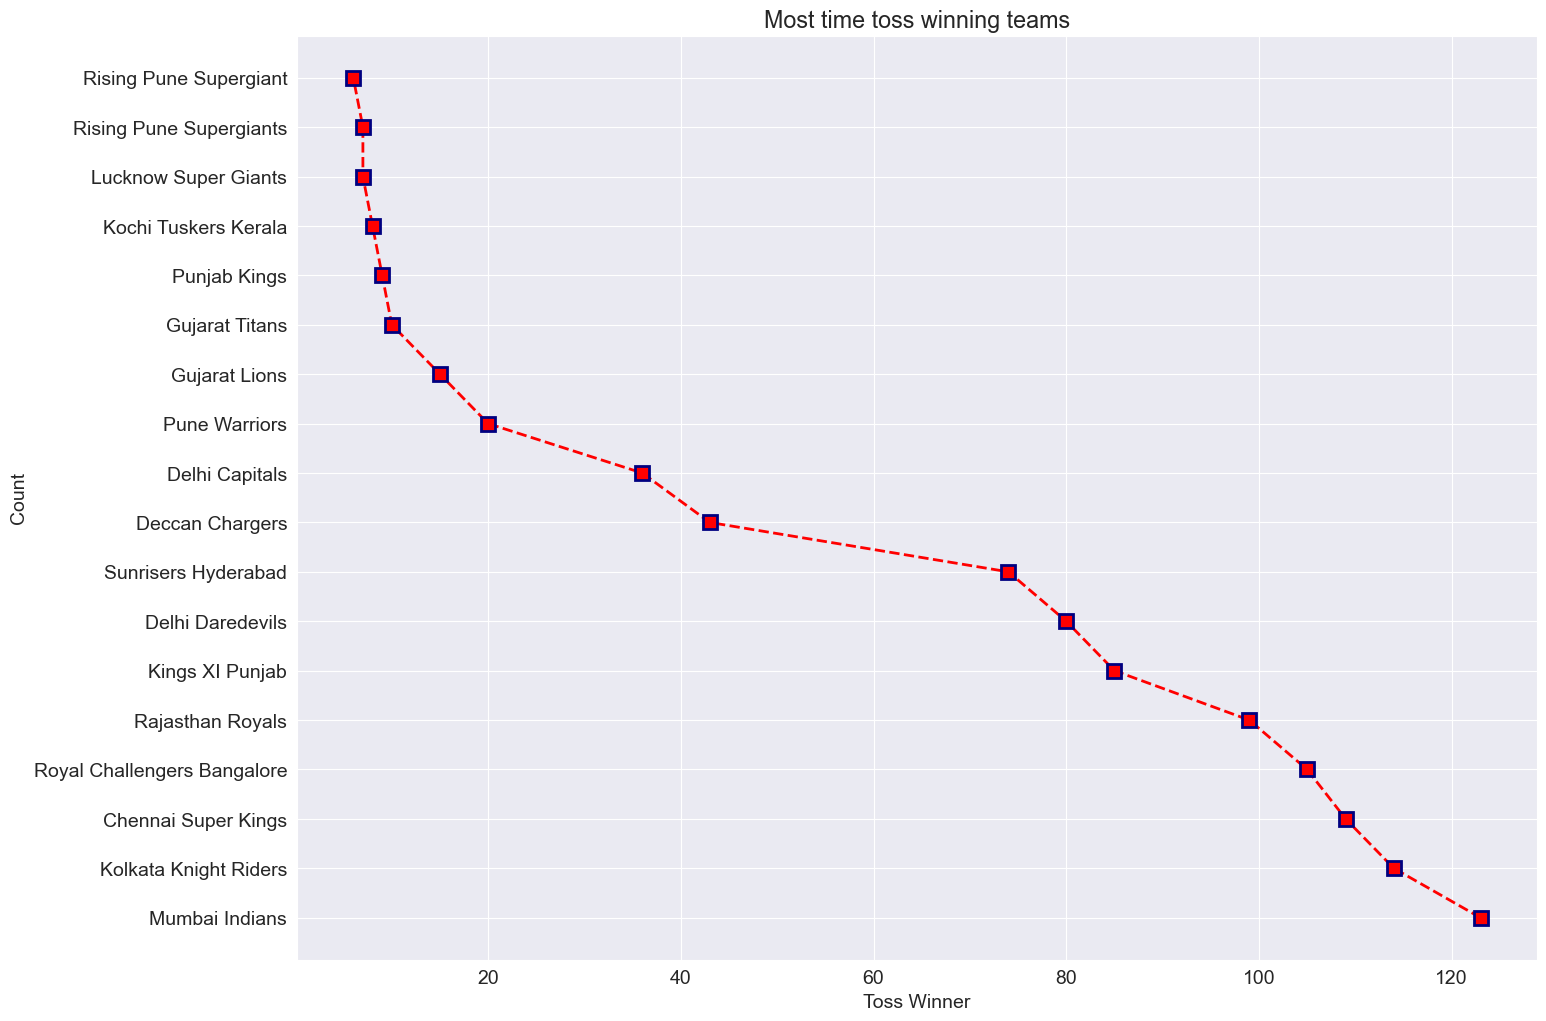

In [46]:
plt.figure(figsize=(16,12))
plt.plot(most_toss_winner['Count'], most_toss_winner['TossWinner'], marker='s', c='r', ls='--', lw=2, ms=10, mew=2, mec='navy')

plt.xlabel('Toss Winner')
plt.ylabel('Count')

plt.title('Most time toss winning teams');

Toss is the most important thing in the cricket, winning the toss has also impact on match win, we will analyze it later. First we can see that **Mumbai Indians**, **Kolkata Knight Riders** and **Chennai Super Kings** won toss most time in IPL history.

## Toss Decision in each Season of IPL

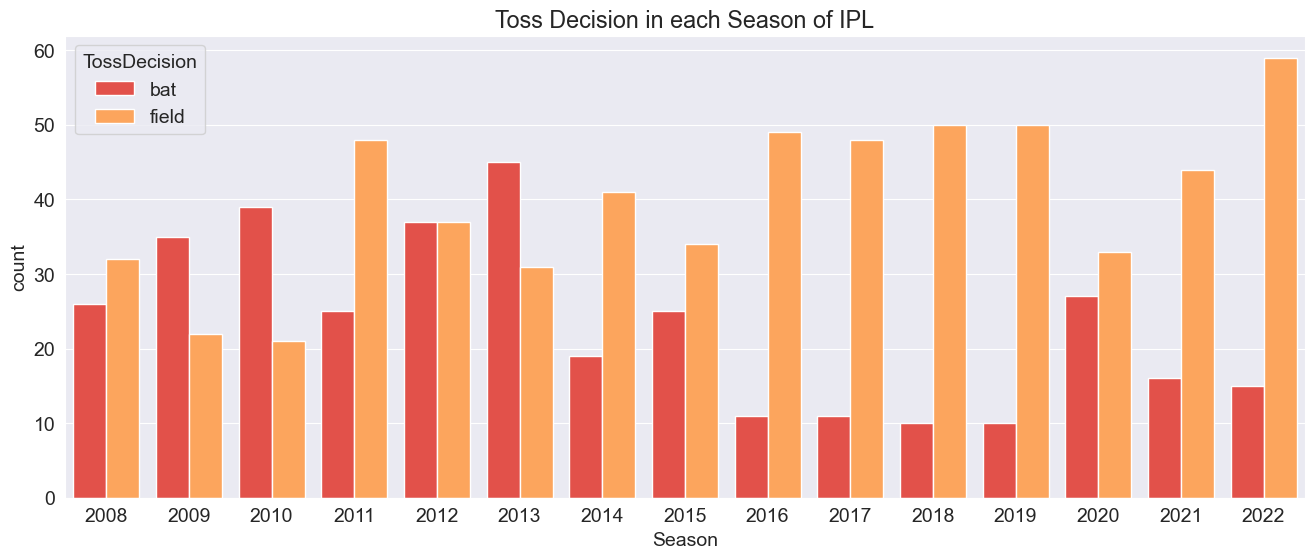

In [47]:
plt.figure(figsize=(16,6))
color_palette = sns.color_palette("Spectral")
sns.countplot(x='Season', hue='TossDecision', data=IPL_matches_df,palette=color_palette,saturation=1)
plt.title('Toss Decision in each Season of IPL');

In 2016, 2017, 2018, and 2019 most of the teams were field first after winning the toss. But the data show that, in 2020 teams went for bat first after winning toss because in 2020 IPL was held in Dubai, and Dubai stadium's ground and weather conditions suit for bat first. After 2020, in 2021 and 2022 teams again chose the field first after winning toss because IPL held again in INDIA.

# Asking and Answering Questions


## Which Team won greater IPL Trophies?

In [48]:
final_df = IPL_matches_df.loc[(IPL_matches_df['MatchNumber']=='Final')][['City','Team1','Team2','WinningTeam']].reset_index().drop(['index'],axis=1)
final_df   

City                        Team1                        Team2  \
0      Ahmedabad             Rajasthan Royals               Gujarat Titans   
1          Dubai          Chennai Super Kings        Kolkata Knight Riders   
2          Dubai               Delhi Capitals               Mumbai Indians   
3      Hyderabad               Mumbai Indians          Chennai Super Kings   
4         Mumbai          Sunrisers Hyderabad          Chennai Super Kings   
5      Hyderabad               Mumbai Indians       Rising Pune Supergiant   
6      Bangalore  Royal Challengers Bangalore          Sunrisers Hyderabad   
7        Kolkata               Mumbai Indians          Chennai Super Kings   
8      Bangalore        Kolkata Knight Riders                 Punjab Kings   
9        Kolkata          Chennai Super Kings               Mumbai Indians   
10       Chennai        Kolkata Knight Riders          Chennai Super Kings   
11       Chennai          Chennai Super Kings  Royal Challengers Bangalore   
12        Mumbai          Chennai Super Kings               Mumbai Indians   
13  Johannesburg  Royal Challengers Bangalore              Deccan Chargers   
14        Mumbai          Chennai Super Kings             Rajasthan Royals   

              WinningTeam  
0          Gujarat Titans  
1     Chennai Super Kings  
2          Mumbai Indians  
3          Mumbai Indians  
4     Chennai Super Kings  
5          Mumbai Indians  
6     Sunrisers Hyderabad  
7          Mumbai Indians  
8   Kolkata Knight Riders  
9          Mumbai Indians  
10  Kolkata Knight Riders  
11    Chennai Super Kings  
12    Chennai Super Kings  
13        Deccan Chargers  
14       Rajasthan Royals

In [49]:
import plotly.express as px
fig = px.pie(final_df, values=final_df['WinningTeam'].value_counts(), names=final_df['WinningTeam'].unique(),
             color =final_df['WinningTeam'].unique(), color_discrete_sequence=pal_vi)
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  sort=False)
fig.update_layout(width=1000, height=550)
fig.show()

Above chart and data show that Gujarat Titans gets most time the title of winner of IPL League.

## Who is the best wicket taker bowler in IPL history?

In [50]:
wicket_tacker_bowler=IPL_ball_by_ball_df.groupby('bowler').sum().reset_index()
wicket_tacker_bowler = wicket_tacker_bowler.sort_values(by='isWicketDelivery',ascending=False).head(10)
wicket_tacker_bowler

bowler          ID  innings  overs  ballnumber  batsman_run  \
109         DJ Bravo  2753913684     4877  42193       12131         4178   
393       SL Malinga  2021719378     4520  29863       10895         3194   
7           A Mishra  2460541226     5114  34546       11857         3897   
317         R Ashwin  3544685082     6330  35355       14531         4387   
468        YS Chahal  3195899222     4600  29039       10582         3524   
401        SP Narine  3426310242     4935  36829       12481         3755   
63           B Kumar  3263792406     5009  27854       12258         3818   
310        PP Chawla  2385117081     4761  33302       11678         4234   
149  Harbhajan Singh  2561445860     5263  29563       12520         3928   
177        JJ Bumrah  3166687251     4330  30825       10323         3298   

     extras_run  total_run  non_boundary  isWicketDelivery  
109         258       4436             1               207  
393         292       3486             0               188  
7           125       4022             1               175  
317         209       4596             0               174  
468         175       3699             0               172  
401         152       3907             0               171  
63          246       4064             1               165  
310         134       4368             0               165  
149         173       4101             0               161  
177         201       3499             0               161

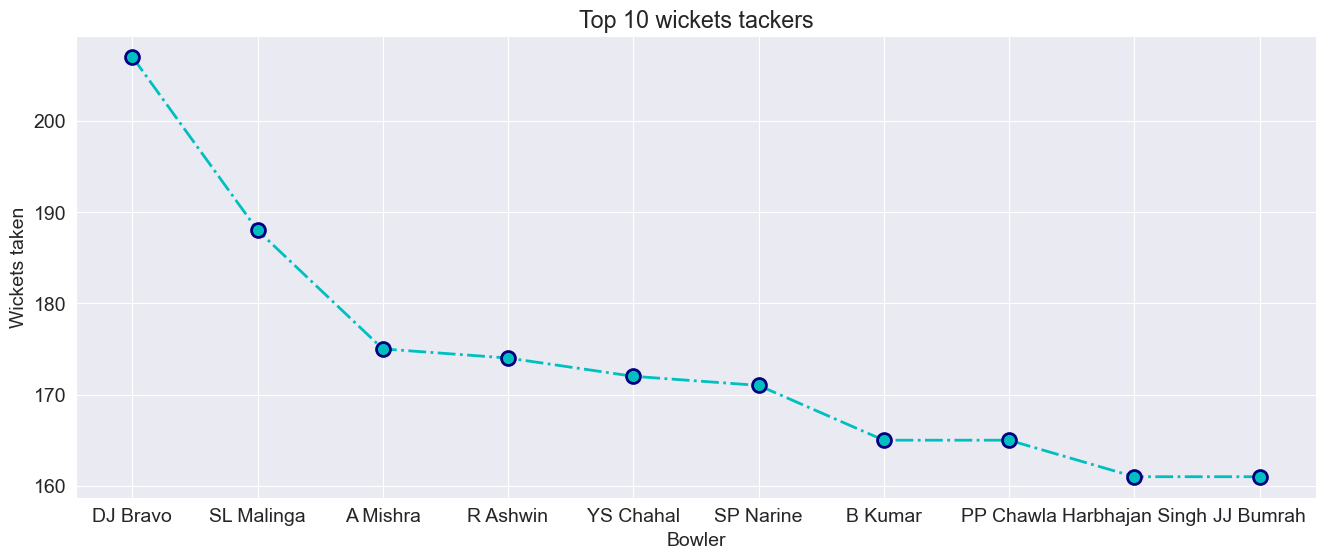

In [51]:
plt.figure(figsize=(16,6))
plt.plot(wicket_tacker_bowler['bowler'], wicket_tacker_bowler['isWicketDelivery'], marker='o', c='c', ls='-.', lw=2, ms=10, mew=2, mec='navy')

plt.xlabel('Bowler')
plt.ylabel('Wickets taken')

plt.title('Top 10 wickets tackers');

By above plot and data we can see that **DJ Bravo** is the most wicket taker bowler in IPL history.

## What is Toss Decision Ratio in IPL?

In [52]:
toss_decision_ratio = IPL_matches_df.TossDecision.value_counts()
toss_decision_ratio

field    599
bat      351
Name: TossDecision, dtype: int64

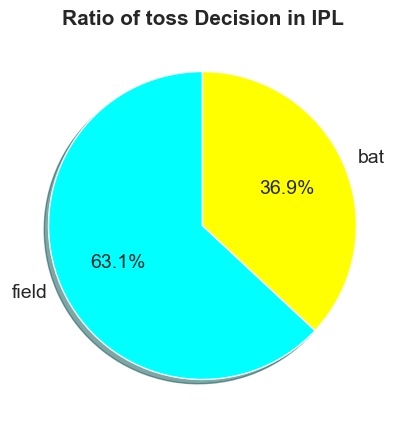

In [53]:
labels = (np.array(toss_decision_ratio.index))
sizes = (np.array((toss_decision_ratio / toss_decision_ratio.sum())*100))
colors = ['cyan', 'yellow']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Ratio of toss Decision in IPL",fontweight="bold",fontsize=15)
plt.show()

In IPL we can see that most of the teams chose to field first after winning toss.

## Is win depend on winning toss?

In [54]:
toss_vs_matchwin = (IPL_matches_df.TossWinner==IPL_matches_df.WinningTeam).value_counts()
toss_vs_matchwin 

False    535
True     415
dtype: int64

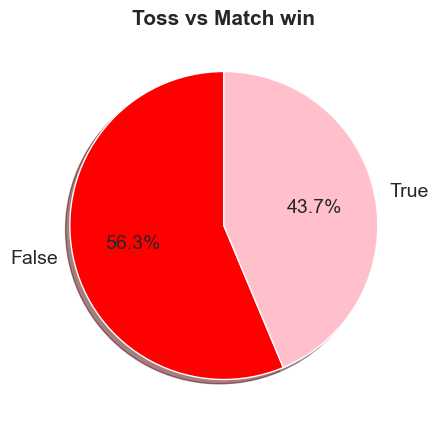

In [55]:
labels = (np.array(toss_vs_matchwin.index))
sizes = (np.array((toss_vs_matchwin / toss_vs_matchwin.sum())*100))
colors = ['red', 'pink']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss vs Match win",fontweight="bold",fontsize=15)
plt.show()

In most of the cases, team win the match after winnig toss.

## Which batsmen have most runs in IPL history?

In [56]:
highest_run_batsmans=IPL_ball_by_ball_df.groupby('batter').sum().reset_index()
highest_run_batsmans = highest_run_batsmans.sort_values(by='batsman_run',ascending=False).head(10)
highest_run_batsmans

batter          ID  innings  overs  ballnumber  batsman_run  \
569         V Kohli  4557729029     7692  42599       18441         6634   
462        S Dhawan  4624377952     7287  31374       17981         6244   
130       DA Warner  3950963740     6376  27099       15161         5883   
430       RG Sharma  3768938581     6697  40783       16371         5881   
493        SK Raina  3095619985     5935  36252       15209         5536   
27   AB de Villiers  2921390058     4989  36682       12684         5181   
108        CH Gayle  2811701391     5097  21811       12774         4997   
339        MS Dhoni  3052807492     5425  52346       14056         4978   
452      RV Uthappa  3105050932     6106  27483       13920         4954   
256      KD Karthik  2794829612     4885  37942       12283         4377   

     extras_run  total_run  non_boundary  isWicketDelivery  
569         242       6876             2               193  
462         317       6561             1               179  
130         308       6191             0               143  
430         202       6083             1               203  
493         244       5780             0               168  
27          173       5354             0               125  
108         339       5336             1               128  
339         243       5221             0               142  
452         292       5246             0               184  
256         195       4572             0               168

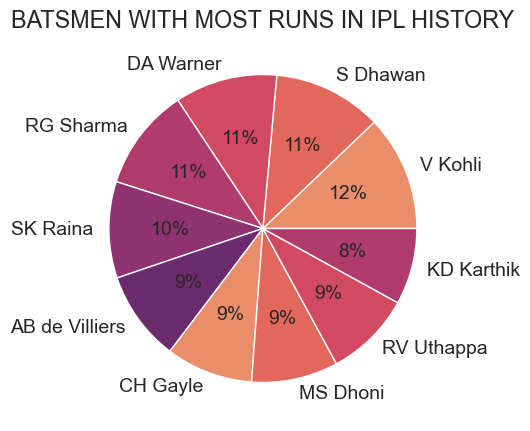

In [57]:
plt.figure(figsize=(12,5))
palette_color = sns.color_palette('flare')
plt.pie(highest_run_batsmans['batsman_run'],labels=highest_run_batsmans['batter'],colors=palette_color,autopct='%.0f%%')
plt.title('BATSMEN WITH MOST RUNS IN IPL HISTORY')
plt.show()

By analyzing data we can see that **V Kholi** has maximum runs in the history of IPL followed by **S Dhawan**, **DA Warner** and **RG Sharma**.

# Inferences and Conclusion
- We analyzing the IPL dataset by different techniques and by plotting charts. We get the information that Mumbai Indians play most matches than other teams and Mumbai Indians winning ratio is also good. So, we get that Mumbai Indian is most successful team of IPL. We also get that Virat Kholi is the most valuable player of IPL beacause he become most time player of match and he is also a batsmen of most runs in IPL history. And DJ Bravo is most wicket taker bawler in IPL history. We also analyze that most toss winning teams chose to field first and most of the toss winning teams also win match. So, we can say that winnig toss depend on match win.

- In this analysis, we also get that in which season most matches played and which city hosted most matches of IPL. We also fin that which team won most time the title of winning IPL and which is the most toss winning team in IPL.

I wish you all will like my project. This Exploratory Data Analysis can be improve and can gives more information by plotting and visulizing different charts.

# References and Future Work

This is my first EDA project. I did my best to complete this project. I learn lot of things by making this project, I got help from pandas, matplotlib and seaborn documentationS. This Project can be improved. In future, I will improve it with great visualization. I will learn more visualization and exploratory data analysis. By using it I will also make some more interestin EDA projects.

References:
- https://pandas.pydata.org/docs/user_guide/index.html
- https://matplotlib.org/stable/api/index.html
- https://seaborn.pydata.org/tutorial.html
- https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv